In [18]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
from IPython.display import clear_output
from src import spotify, dp, utils

In [ ]:
# 1. Get Token
token = spotify.get_token()
print(token)

# 2. Select Music
sel_tracks = spotify.search_tracks(token)

# 3. Data Processing
genres = spotify.get_genres(token, sel_tracks)
features = spotify.get_features(token, sel_tracks)
recos = spotify.get_recommend(sel_tracks, features, genres, token)
reco_features = spotify.get_features(token, recos)

{'access_token': 'BQA1PmVrzYOHDLFpdVFVd9mh-VHhk-AfvE31fTV0l9BjxF9DBSaJvsJmvwMl63EUxSAp62rgRB_sOaWstYg-PI84_db5rGmgRGNY0JA', 'token_type': 'Bearer', 'expires_in': 3600, 'scope': 'streaming user-modify-playback-state user-read-email user-read-private'}


### sel tracks (우체통)
- 사용자의 음악 성향

In [4]:
sel_tracks.head()

,id,name,artists,artists_name
0,2FWquqPNxte8iqZ3ATQG0p,All I Wanna Do (K) (Feat. Hoody & Loco),4XDi67ZENZcbfKnvMnTYsI,Jay Park
1,4Dr2hJ3EnVh2Aaot6fRwDO,Blueming,3HqSLMAZ3g3d5poNaI7GOU,IU
2,7sp5iTQjB7GHXX4TKrhOaO,나였으면,49fyJl5wIzI5GtRuCKxKRw,Na Yoon Kwon
3,0KkYTAoadG6O5J4Wshhq9s,Emily,4jXfFzeP66Zy67HM2mvIIF,Bill Evans


In [5]:
features.head()

,id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,2FWquqPNxte8iqZ3ATQG0p,0.403,0.724,8,-6.064,0.2460,0.3770,0.000,0.0927,0.4280,97.133
1,4Dr2hJ3EnVh2Aaot6fRwDO,0.819,0.674,0,-3.145,0.0587,0.0849,0.000,0.0667,0.6820,106.032
2,7sp5iTQjB7GHXX4TKrhOaO,0.395,0.371,9,-7.512,0.0289,0.6430,0.000,0.1380,0.0761,71.048
3,0KkYTAoadG6O5J4Wshhq9s,0.462,0.383,7,-13.348,0.0442,0.9370,0.624,0.7330,0.2210,78.155


### recos
- 사용자가 등록한 음악으로 Spotify API 에서 추천된 음악

In [6]:
recos.head()

,id,name,artists,artists_name
0,1OGwtlps3T1Fo70q6zZUAs,Are You Real - Remastered,6ykfXAed2KOLOMI3R0TZdz,Art Blakey & The Jazz Messengers
1,2PcJoVkfjcbvoqBxV1Nj7y,All I Wanna Do,4XDi67ZENZcbfKnvMnTYsI,Jay Park
2,2VzRmb0GCPDBv6FddHGu7s,Hat And Beard,6rxxu32JCGDpKKMPHxnSJp,Eric Dolphy
3,6z1kLsntE7FuzKZHZWrXYN,instagram,3eCd0TZrBPm2n9cDG6yWfF,DEAN
4,2xYnqYBNL62ypPiA0wjD0s,AUTOMATIC,0LyfQWJT6nXafLPZqxe9Of,Various Artists


In [7]:
reco_features.head()

,id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,1OGwtlps3T1Fo70q6zZUAs,0.523,0.667,8,-7.283,0.0682,0.608,0.0227,0.3320,0.665,108.162
1,2PcJoVkfjcbvoqBxV1Nj7y,0.613,0.668,8,-6.867,0.2670,0.245,0.0000,0.0735,0.509,96.176
2,2VzRmb0GCPDBv6FddHGu7s,0.465,0.644,8,-7.646,0.1060,0.496,0.1790,0.1760,0.355,81.896
3,6z1kLsntE7FuzKZHZWrXYN,0.463,0.566,8,-6.195,0.1450,0.196,0.0000,0.2840,0.219,93.921
4,2xYnqYBNL62ypPiA0wjD0s,0.720,0.703,8,-5.281,0.0409,0.133,0.0000,0.1210,0.492,99.999


### norm data
- 정규화

In [8]:
norm_features = dp.make_norm(features, reco_features)

norm_features.head()

,id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,2FWquqPNxte8iqZ3ATQG0p,0.312586,0.755966,0.727273,0.859982,0.622481,0.377877,0.000000,0.084848,0.422651,0.269843
1,4Dr2hJ3EnVh2Aaot6fRwDO,0.887967,0.702215,0.000000,0.959668,0.090832,0.084303,0.000000,0.055117,0.704122,0.330146
2,7sp5iTQjB7GHXX4TKrhOaO,0.301521,0.376478,0.818182,0.810532,0.006245,0.645219,0.000000,0.136650,0.032691,0.093081
3,0KkYTAoadG6O5J4Wshhq9s,0.394191,0.389379,0.636364,0.611229,0.049674,0.940702,0.651357,0.817038,0.193262,0.141240
4,1OGwtlps3T1Fo70q6zZUAs,0.478562,0.694689,0.727273,0.818353,0.117797,0.610042,0.023695,0.358491,0.685284,0.344580


### 추천된 데이터들의 audio features 시각화

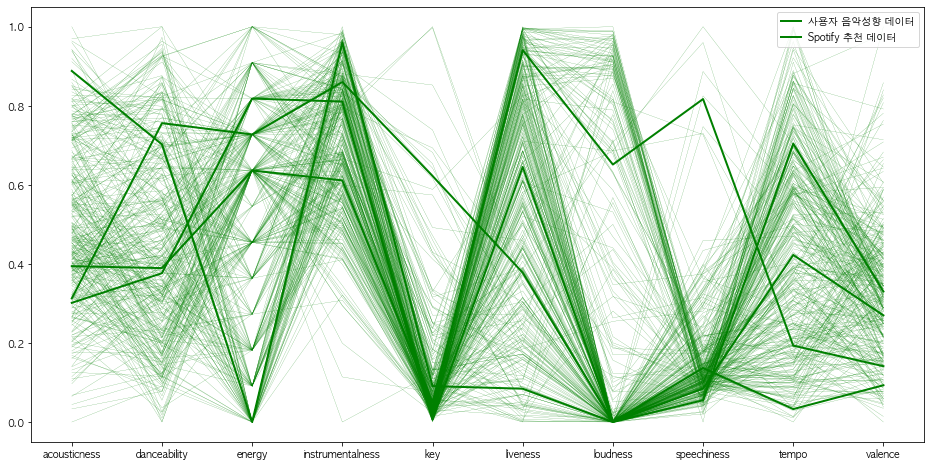

In [9]:
utils.visual_norm_data(sel_tracks, norm_features)

### KMeans

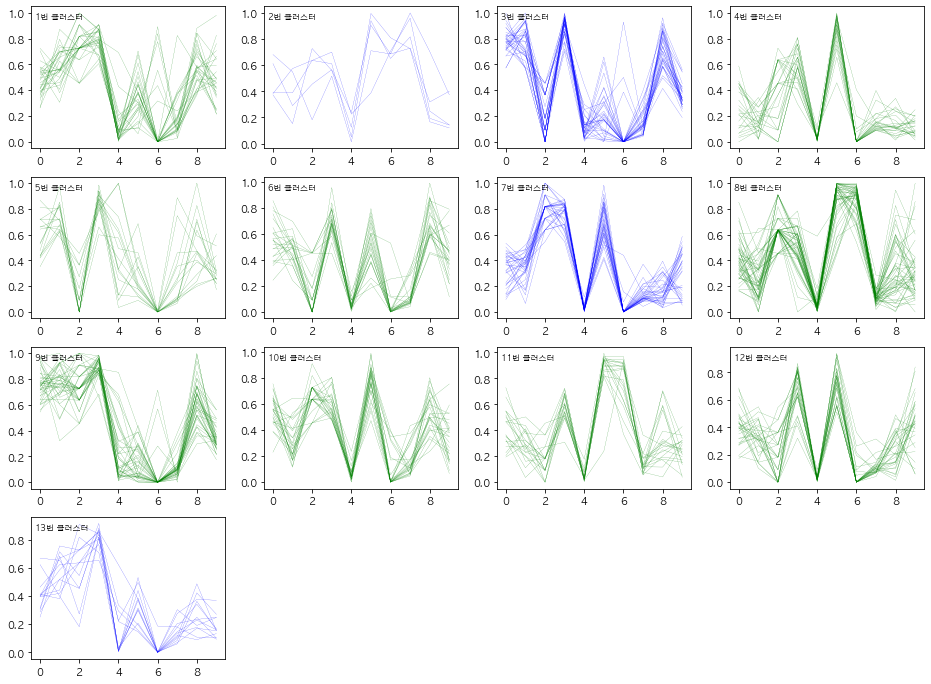

In [10]:
kmeans = utils.KMeans(
    datas=norm_features
)
kmeans.run(early_stop_cnt=5)
clear_output(wait=True)

utils.visual_cluster_data(sel_tracks, kmeans)

In [11]:
_filtering_music_list = dp.music_filtering(sel_tracks, kmeans)

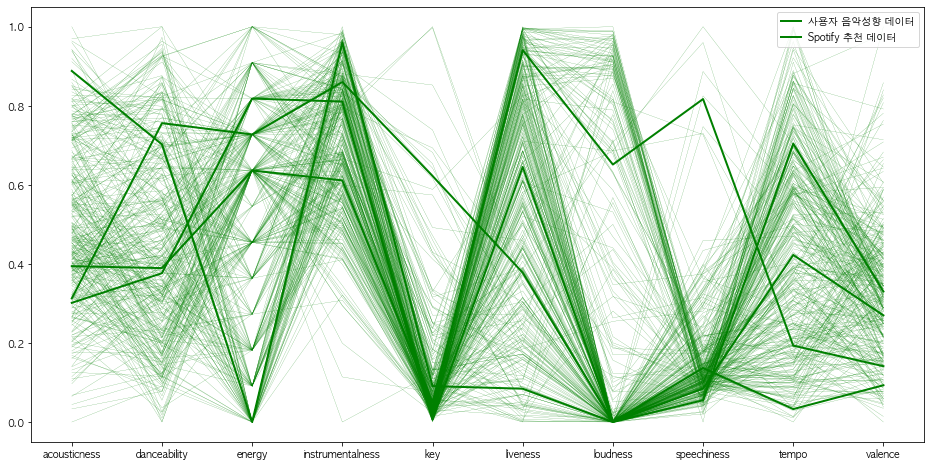

In [12]:
utils.visual_norm_data(sel_tracks, norm_features)

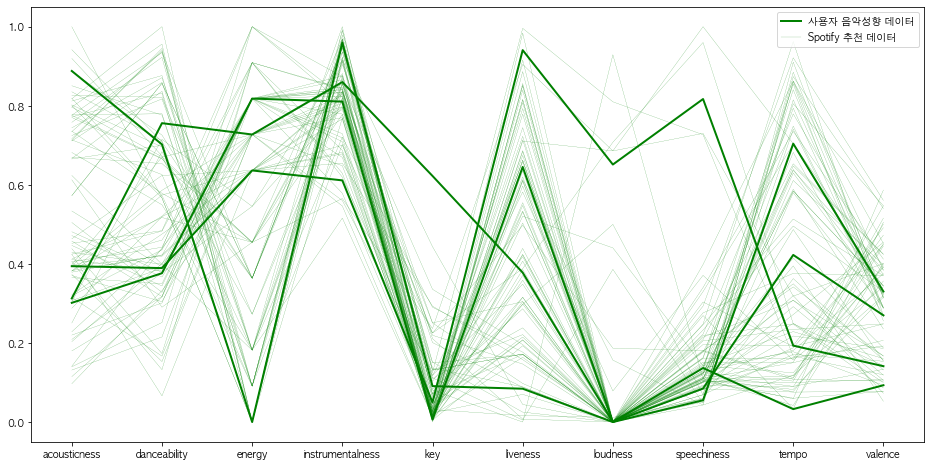

,id,name,artists,artists_name
0,1OGwtlps3T1Fo70q6zZUAs,Are You Real - Remastered,6ykfXAed2KOLOMI3R0TZdz,Art Blakey & The Jazz Messengers
1,2PcJoVkfjcbvoqBxV1Nj7y,All I Wanna Do,4XDi67ZENZcbfKnvMnTYsI,Jay Park
2,2VzRmb0GCPDBv6FddHGu7s,Hat And Beard,6rxxu32JCGDpKKMPHxnSJp,Eric Dolphy
3,6z1kLsntE7FuzKZHZWrXYN,instagram,3eCd0TZrBPm2n9cDG6yWfF,DEAN
4,2xYnqYBNL62ypPiA0wjD0s,AUTOMATIC,0LyfQWJT6nXafLPZqxe9Of,Various Artists


In [13]:
filter_music = norm_features.set_index("id").loc[_filtering_music_list].reset_index()
reco_musics = [_ in _filtering_music_list for _ in recos['id']]
recos[reco_musics]

utils.visual_norm_data(sel_tracks, filter_music)
recos.head()

In [14]:
genres

,count
k-pop,2
jazz,1


In [17]:
spotify.get_genres(token,recos[reco_musics])

,count
k-pop,42
jazz,15
soul,2
ska,1
funk,1
